# Comparaison en moyenne de Git et Golden Bisect

In [3]:
import pandas as pd

from IPython.display import Image

## 1. Introduction

Dans ce notebook, on s'intéresse à la comparaison en moyenne des algorithmes Git Bisect et Golden Bisect.

On rappelle que Golden Bisect est très similaire à Git Bisect. Il se base en effet sur un système de score comme Git Bisect, à la différence qu'il utilise une comparaison du score qui mène au calcul d'ensembles de noeuds spécifiques pour proposer un noeud à tester plutôt que de prendre le noeud avec le plus grand score. 

Pour la réaliser, on utilise une structure d'arbre binaire. A chaque tour de boucle, les algorithmes nous proposent un noeud à tester pour savoir s'il a un bug ou non. On va donc ajouter à notre arbre les noeuds proposés. L'enfant gauche d'un noeud $n$ sera le noeud proposé dans le cas où $n$ avait le bug, l'enfant droit sera donc le cas où $n$ n'avait pas le bug.

Enfin, on va aussi différencier les noeuds proposé dans la boucle et le noeud renvoyé. Le noeud renvoyé ne sera pas dans un cercle et les noeuds proposés (ou intermédaires) seront dans un cercle.

Par exemple, prenons le graphe suivant :

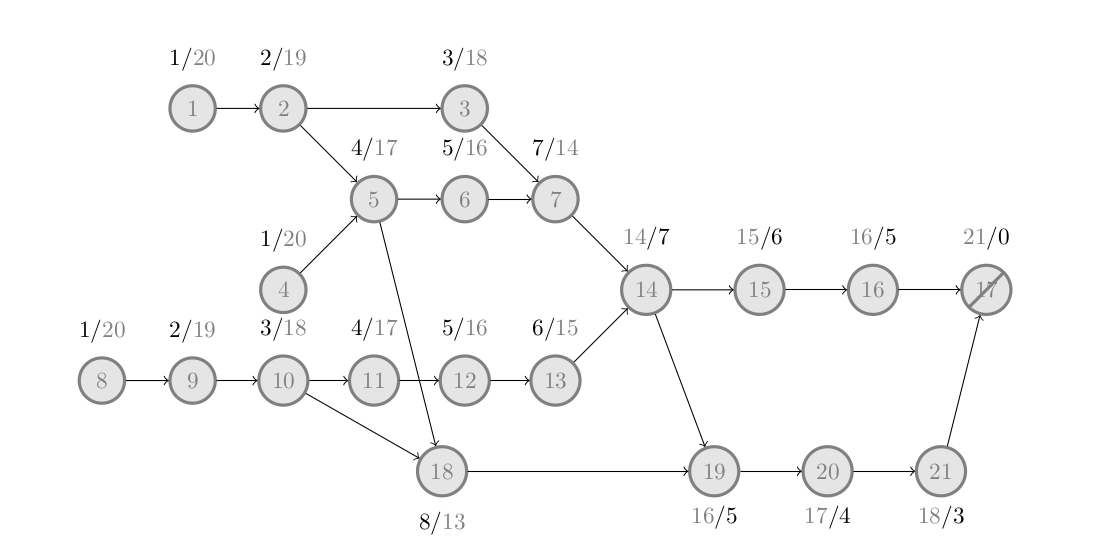

In [4]:
Image("Images/DAG1.png")

On obtient l'arbre pour Git Bisect :

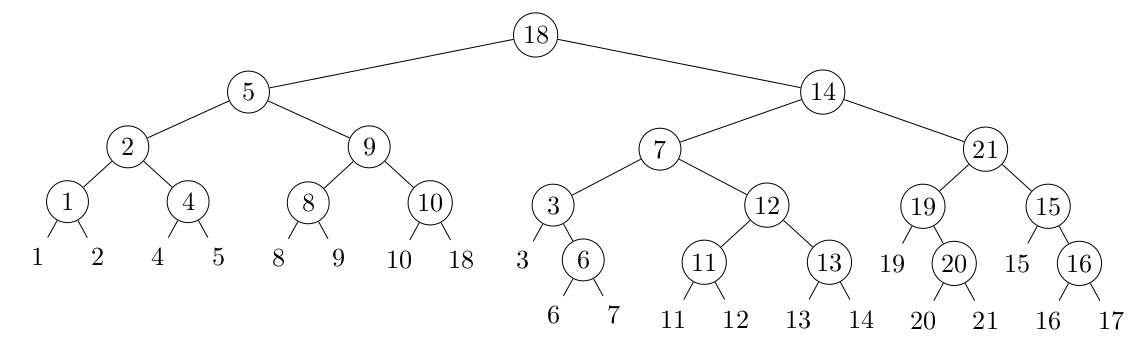

In [5]:
Image("Images/GB1.png")

Et pour Golden Bisect :

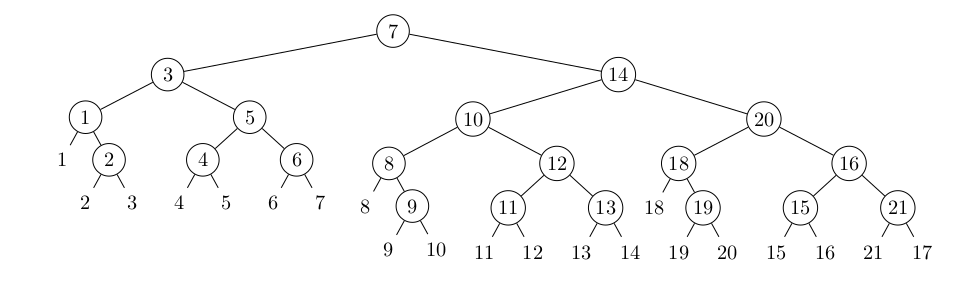

In [7]:
Image("Images/GoB1.png")

On veut mesurer ici, le nombre de fois où on teste les noeuds (qu'on appelle requête) avant d'avoir le commit fautif.

On remarque qu'une branche correspond à la séquence de noeuds nécessaires pour obtenir le commit fautif (la feuille de la branche). La hauteur de la branche est donc le nombre de noeuds - 1 qui la composent. Cette hauteur correspond donc au nombre de requêtes.

Comme les deux algorithmes prennent un noeud de départ $b$, l'arbre produit est différent car la 1ère étape est de supprimer les noeuds non-ancêtres de $b$ (qui n'a pas de chemin vers $b$).

L'idée est donc de produire l'arbre lié à chaque feuille. Pour chaque arbre on fait la moyenne des hauteurs des branches ce qui nous donne le nombre de requêtes en moyenne pour un arbre. Enfin, on fait la moyenne des moyennes pour avoir la moyenne générale pour un graphe.

## 2. Résultats

On applique la méthode ci-dessus sur nos graphes **small** et **medium**. 

Pour rappel, on a à notre disposition 110 graphes issus de projets GitHub. Les graphes **small** sont ceux qui ont entre 100 et 10000 noeuds et les **medium** sont ceux entre 10000 et 100000 noeuds.

On obtient deux CSV, avec plusieurs colonnes :
- File name est le nom du graphe
- Nodes count, le nombre de noeuds dans le graphe
- AVG Git et AVG Golden, le nombre de requêtes en moyenne calculé avec les arbres pour Git et Golden Bisect
- AVG Golden used, le nombre de fois où on utilise la comparaison spécifique de Golden Bisect au lieu de la comparaison classique de Git Bisect
- AVG nodes differences between golden/git, le nombre de noeuds différents en moyenne dans les arbres produits pour Git et Golden
- nodes differences between golden/git, le nombre de noeuds différents entre les arbres produits pour Git et Golden

In [10]:
df_small = pd.read_csv('CSV/GitDAG/stats_bisect_small.csv')
df_small

,File name,Nodes count,AVG Git,AVG Golden,AVG Golden used,AVG nodes differences between golden/git,nodes differences between golden/git
0,git.age.tdag,3672,8.8569,8.8569,107.8131,0.0000,0
1,git.answer.tdag,7241,11.9781,11.9781,684.1372,1.3720,520
2,git.flink-cdc.tdag,6615,9.2817,9.2817,104.7195,0.0000,0
3,git.fury.tdag,5834,9.0074,9.0074,88.9790,0.0000,0
4,git.guacamole-server.tdag,4648,11.7759,11.7759,473.9913,0.2522,29
5,git.horaedb.tdag,6216,8.7304,8.7304,103.7858,0.0044,5
6,git.incubator-hivemall.tdag,4172,10.8811,10.8811,259.5870,0.2105,52
7,git.incubator-livy.tdag,2155,8.7795,8.7795,56.8097,0.0000,0
8,git.incubator-pagespeed-ngx.tdag,7399,8.7112,8.7112,76.5525,0.0749,35
9,git.incubator-teaclave.tdag,2005,8.1339,8.1339,72.2802,0.0000,0


In [12]:
df_medium = pd.read_csv('CSV/GitDAG/stats_bisect_medium.csv')
df_medium

,File name,Nodes count,AVG Git,AVG Golden,AVG Golden used,AVG nodes differences between golden/git,nodes differences between golden/git
0,git.apisix.tdag,30773,11.0975,11.0975,372.52,0.01,1
1,git.cassandra.tdag,51376,14.7036,14.7036,4878.98,15.53,1553
2,git.celeborn.tdag,13454,9.8293,9.8293,167.31,0.00,0
3,git.couchdb.tdag,25670,13.4758,13.4758,2366.32,0.04,4
4,git.dolphinscheduler.tdag,46925,12.5140,12.5141,979.58,1.42,142
5,git.druid.tdag,70919,13.4193,13.4193,2019.40,1.34,134
6,git.eclipse.platform.swt.tdag,35813,14.5384,14.5384,2385.29,0.05,5
7,git.eclipse.platform.tdag,49585,14.9697,14.9697,7786.42,0.00,0
8,git.eclipse.platform.ui.tdag,93275,14.8504,14.8504,6636.08,0.06,6
9,git.eventmesh.tdag,18378,11.5623,11.5623,511.39,0.32,32


## 3. Analyse

On remarque tout de suite que le nombre de requêtes en moyenne n'est pas très grand même pour des graphes à plus de 90000 noeuds. (12 au maximum pour les small et 15 au maximum pour les medium)

On remarque aussi quelque chose de surprenant : les moyennes de Git et Golden sont exactement les mêmes. En fait on peut l'expliquer par la structure des arbres produits.

On a 3 cas d'arbre :
- Les arbres produits par Git et Golden sont les mêmes. Par exemple, dans les graphes medium, on remarque que le graphe **git.celeborn.tdag** ne possède aucun noeud différent entre les deux algorithmes ce qui indique que les arbres sont identiques. Dans ce cas soit les noeuds sont exactement au même endroits soit la strucutre de l'arbre est la même avec seulement quelques noeuds qui ont échangés de place.
- Les arbres produits sont bien différents mais la moyenne de leur branches sont les mêmes (voir exemple ci dessous). 
- Les arbres produits sont différents et la moyenne de leurs branches sont différentes. On ne voit pas ce cas sur nos graphes cependant, on le voit sur notre graphe d'exemple plus haut. La moyenne pour Git est de $\frac{94}{21} \approx 4,48$ et pour Golden $\frac{95}{21} \approx 4,52$

Exemple de graphe avec des arbres diffénrents mais avec la même moyenne (1er arbre = Git / 2ème = Golden) :

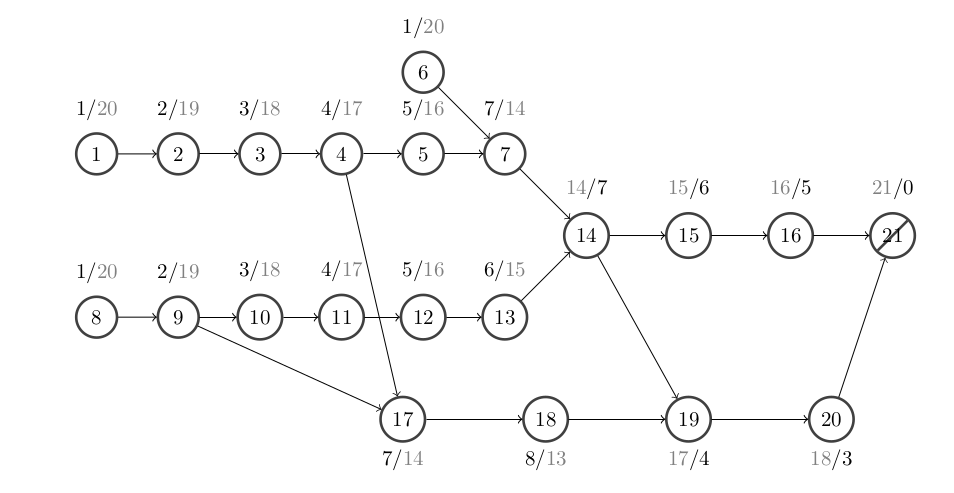

In [14]:
Image("Images/DAG2.png")

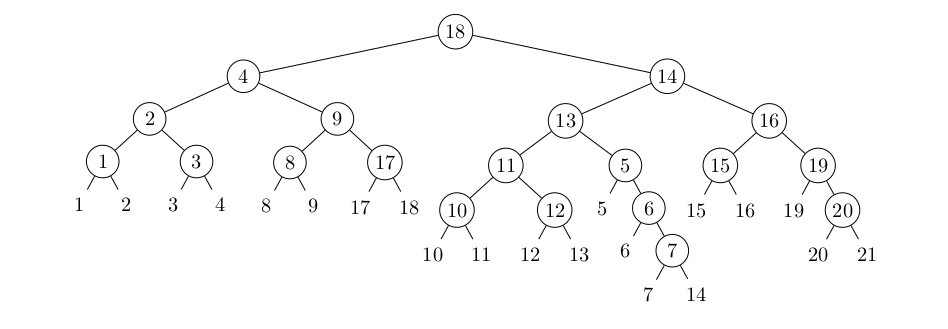

In [15]:
Image("Images/GB2.png")

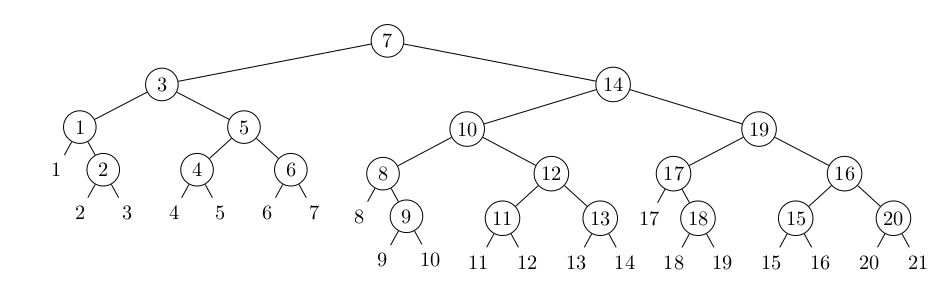

In [16]:
Image("Images/GoB2.png")

Ici, les moyennes sont toutes les deux de $\frac{95}{21} \approx 4,52$.

## 3. Conclusion

Après analyse, on voit qu'en moyenne, Git et Golden Bisect ont exactement les même complexité. Ce n'est pas si étonnant vu que Goldne Bisect est très similaire à Git Bisect.

Il faut tout de même ajouter que Golden Bisect est plus efficace que Git Bisect dans le pire cas. C'est donc potentiellement intéressant de l'utiliser puisque de toute façon, il est tout autant efficace en moyenne que Git Bisect.